In [836]:
# Autor: Marcos Paulo de Oliveira Pereira
#
#
# Data: 04/06/2023
#
#
# Objetivo: Explorar os dados fornecidos pela empresa Northwind Traders afim de descobrir e interpretar indicadores de perfomance chave que possam impulsionar o crescimento da
#empresa a curto, médio e longo prazo.
#
#

# Relatório de Indicadores de Perfomance da Northwind Traders

Tendo em mãos o banco de dados da empresa e utilizando Python e as bibliotecas Pandas, Matplot e Seaborn para separação, tratamento e análise adequada dos dados, foi possível visualizar de diferentes maneiras suas atividades do ano de 1996 ao ano de 1998.



In [837]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tratamento inicial dos dados

Nas primeiras linhas de código, os dados são trazidos para aplicação e devidamente tratados.

In [838]:
# Lista de arquivos CSV
csv_files = ["categories.csv", "orders.csv", "products.csv", "region.csv", "shippers.csv", 
             "suppliers.csv", "territories.csv", "us_states.csv", "customer_customer_demo.csv",
             "customer_demographics.csv", "customers.csv", "employee_territories.csv", "employees.csv",
             "order_details.csv"]


# Função para criar os dataframes para cada tabela
def read_csv_files():
    dfs = {}
    for file in csv_files:
        name = file.split(".")[0]
        dfs[name] = pd.read_csv(file, sep=";")
    return dfs

dfs = read_csv_files()

orders = dfs['orders']
order_details = dfs['order_details']
products = dfs['products']

# Convertendo a coluna de data para datetime e criando separadamento para mês e ano
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['month'] = orders['order_date'].dt.month
orders['year'] = orders['order_date'].dt.year

## Números de Vendas nos últimos anos

### Em relação ao faturamento e o ticket médio mensal 

Para iniciar a avaliação, trazemos os números brutos da empresa no respectivo período de tempo, tais como o **faturamento mensal**, **faturamento total no ano**, **quantidade de vendas mensais** e o **valor do ticket médio mensal**.

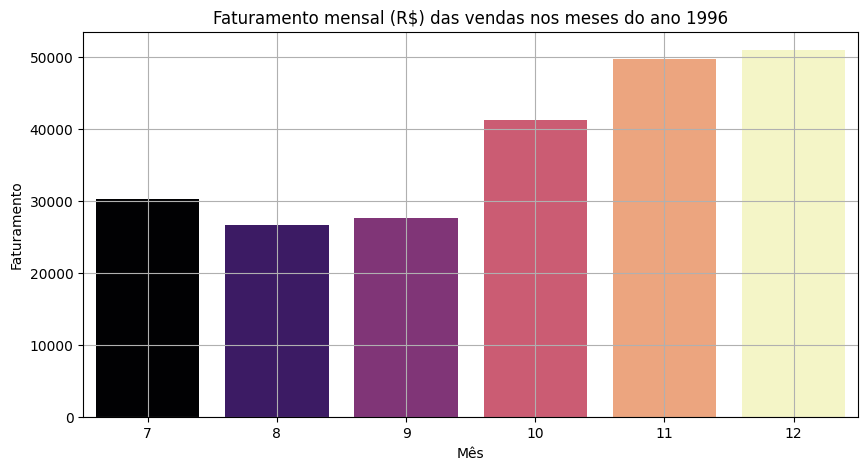

Faturamento total das vendas em 1996: R$ 226298.50


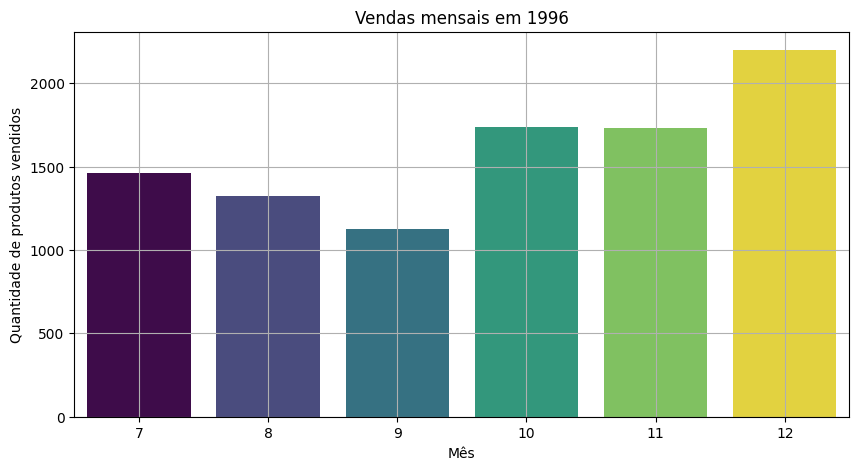

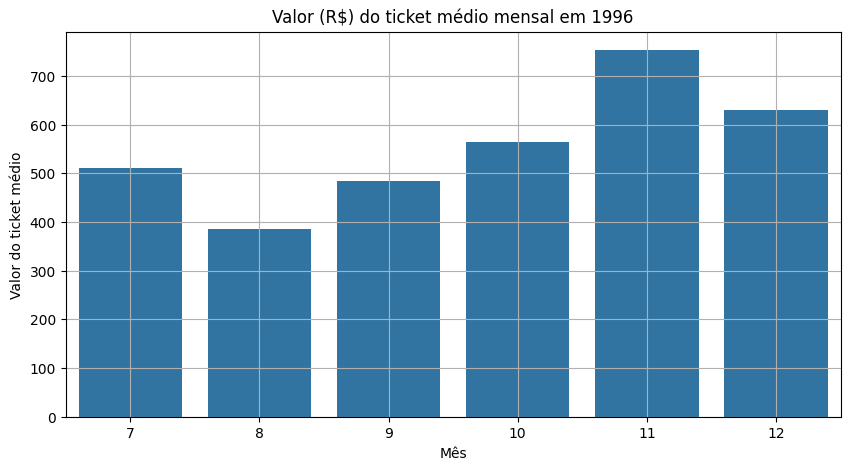

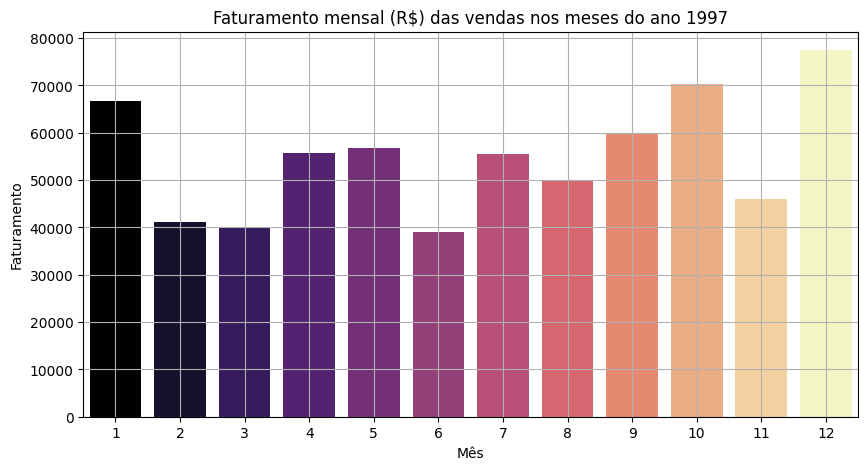

Faturamento total das vendas em 1997: R$ 658388.75


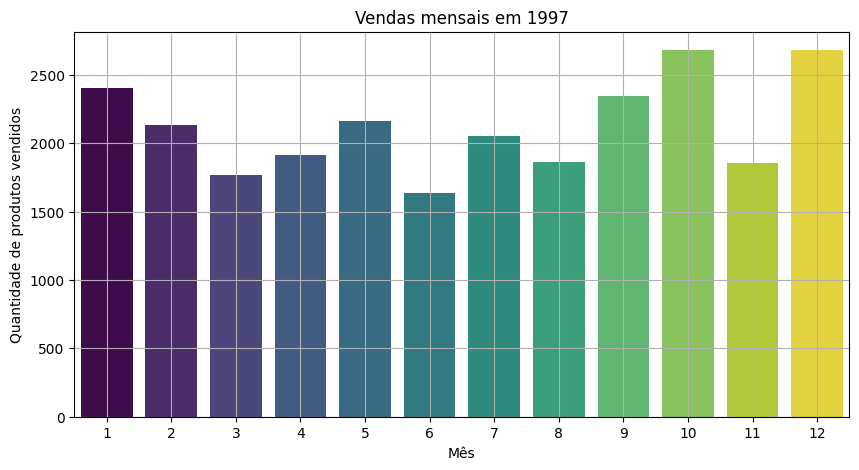

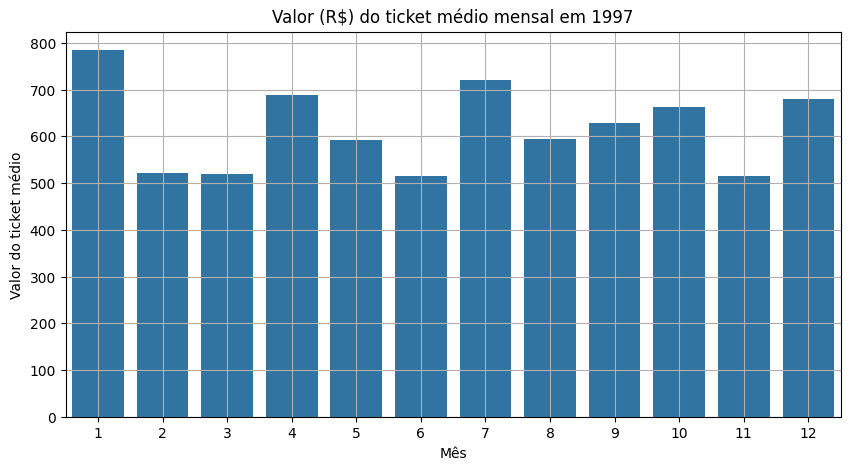

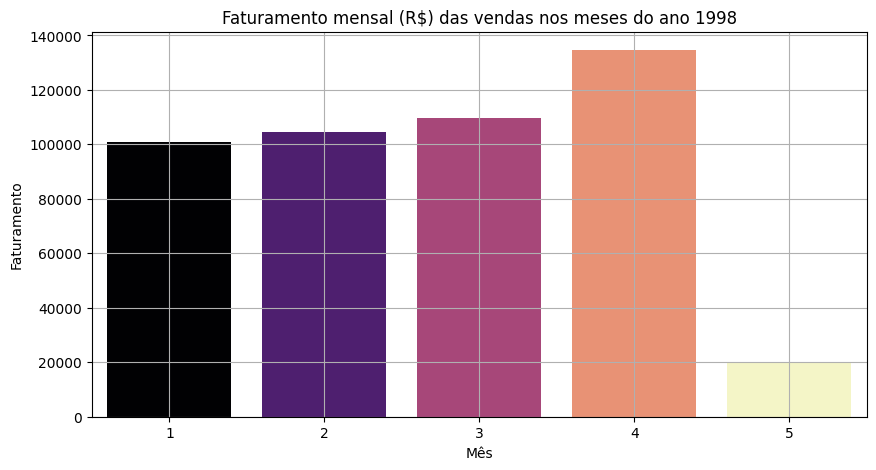

Faturamento total das vendas em 1998: R$ 469771.34


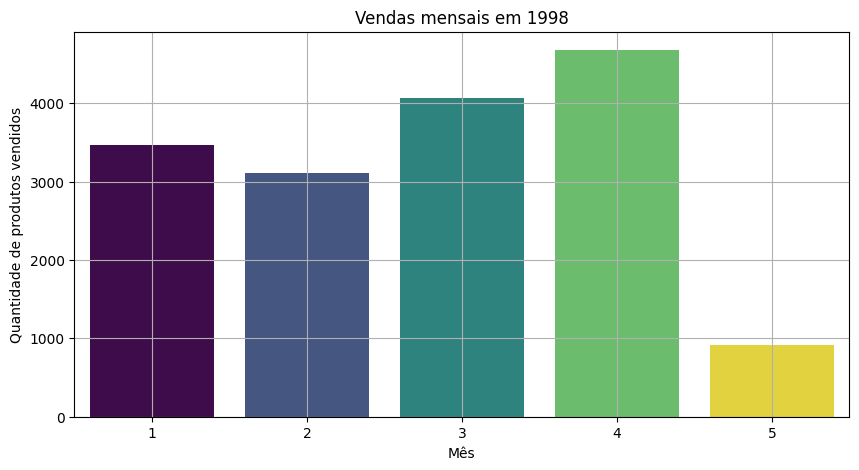

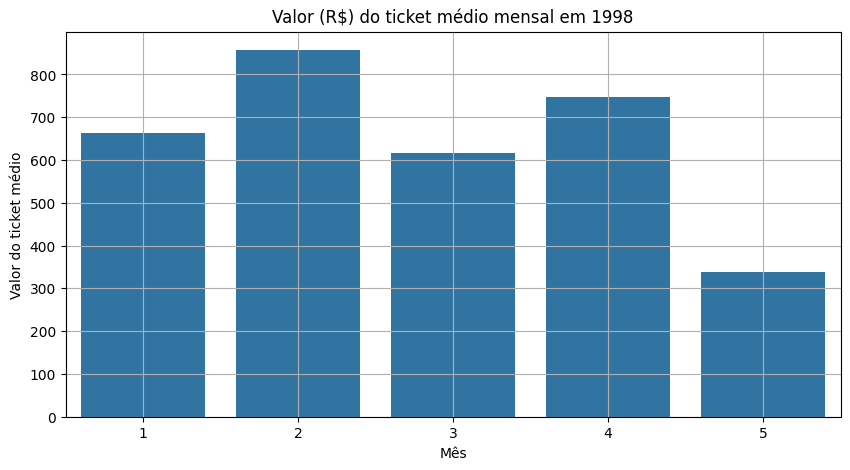

In [839]:
# Filtrando os pedidos dos últimos 3 anos
years = [1996, 1997, 1998]

for year in years:
    orders_year = orders[orders['year'] == year]
    merged_data = pd.merge(orders_year, order_details, on='order_id')
    merged_data = pd.merge(merged_data, products, on='product_id')
    merged_data['total_price'] = merged_data['quantity'] * merged_data['unit_price_x']
    value_counts = merged_data.groupby('month')['total_price'].sum()
    value_counts = value_counts.sort_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='magma', legend=False)
    plt.title(f'Faturamento mensal (R$) das vendas nos meses do ano {year}')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.grid()
    plt.show()
    total_price = merged_data['total_price'].sum()
    print(f'Faturamento total das vendas em {year}: R$ {total_price:.2f}')

    value_counts = merged_data.groupby('month')['quantity'].sum()
    value_counts = value_counts.sort_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis', legend=False)
    plt.title(f'Vendas mensais em {year}')
    plt.xlabel('Mês')
    plt.ylabel('Quantidade de produtos vendidos')
    plt.grid()
    plt.show()
    # Valor do ticket médio mensal
    value_counts = merged_data.groupby('month')['total_price'].mean()
    value_counts = value_counts.sort_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=value_counts.index, y=value_counts.values, legend=False)
    plt.title(f'Valor (R$) do ticket médio mensal em {year}')
    plt.xlabel('Mês')
    plt.ylabel('Valor do ticket médio')
    plt.grid()
    plt.show()


É possível observar que a empresa tem sua melhor fase normalmente ao fim do ano, tendo sido muito lucrativa em dezemebro de 1996 e 1997. O valor do **ticket médio** pode subir consideravelmente nos últimos 3 meses do ano, tendo em vista o faturamental mensal elevado e a quantidade de vendas elevada. O mês de novembro pode ser mais explorado, já que normalmente o mesmo apresenta grande demanda.
No começo do ano de 1998, o mês de janeiro talvez pudesse ter sido melhor aproveitado, se puxarmos o ano anterior onde ele apresentou um dos melhores números de venda com um elevado ticket médio.

### Em relação ao catalógo de produtos

A **Northwind Traders**, tem um vasto catalógo de produtos divididos em bebidas, alimentos e utensílios domesticos.
Para indicar como a empresa está indo, é necessário saber quais produtos são os **mais vendidos**, quais são os **menos vendidos** e também quais **categorias** de processos fazem mais **sucesso entre seus clientes**.
Alguns gráficos podem ajudar a exemplificar a situação de uma maneira melhor.

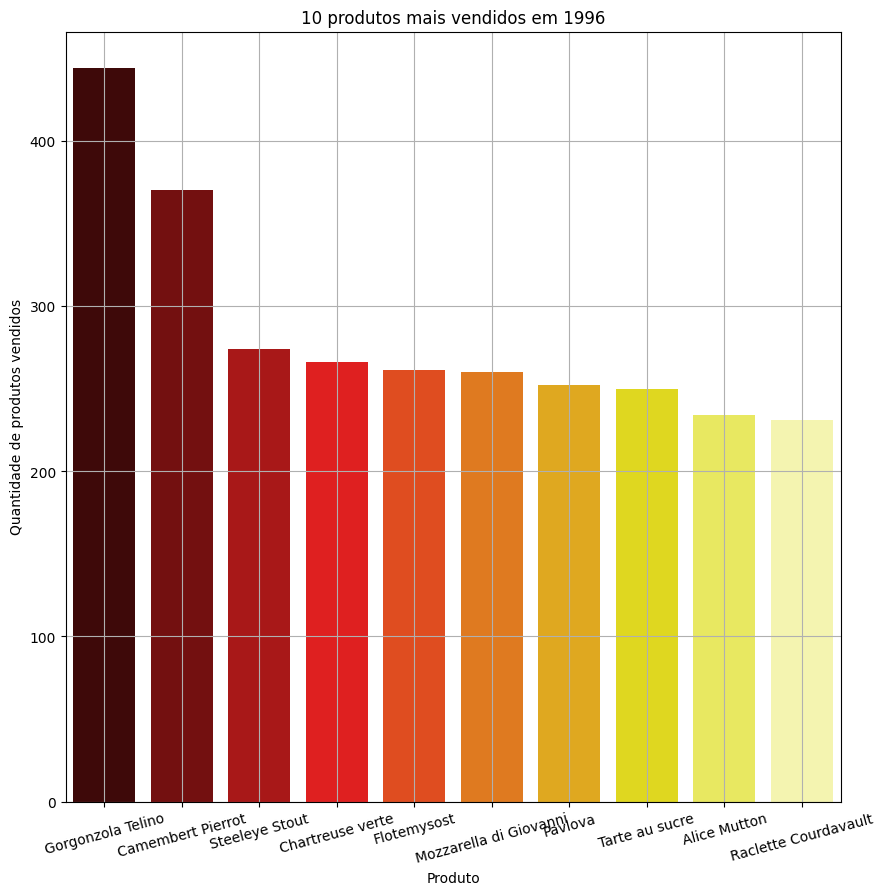

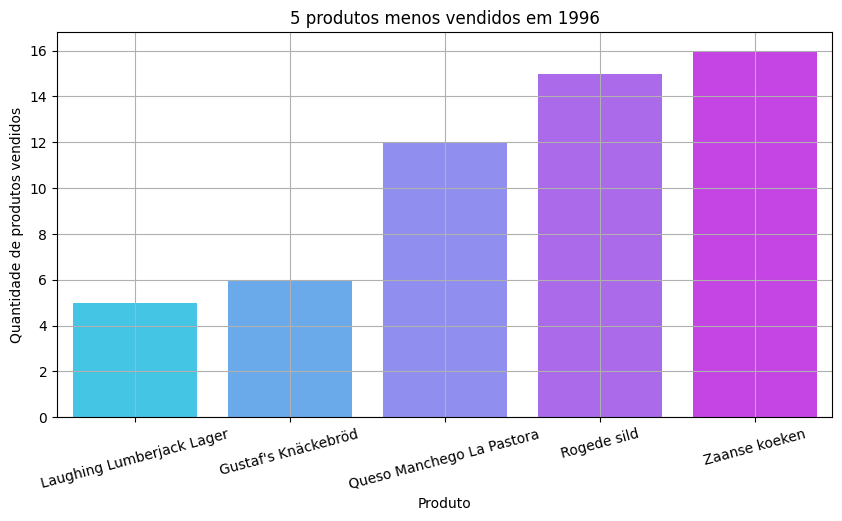

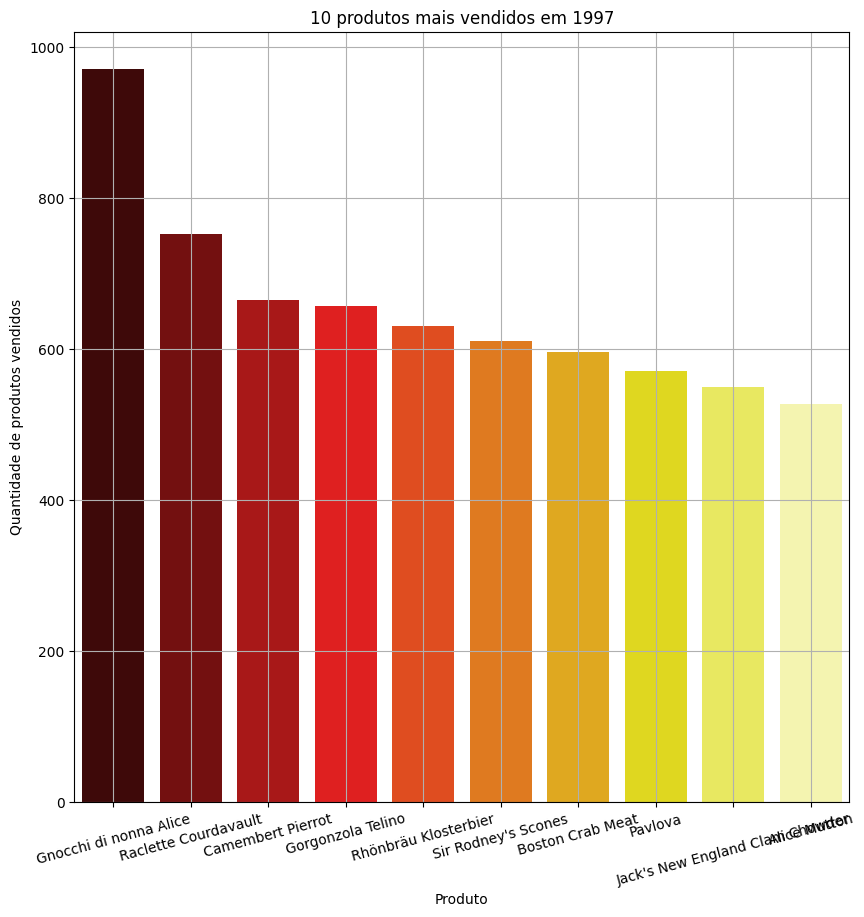

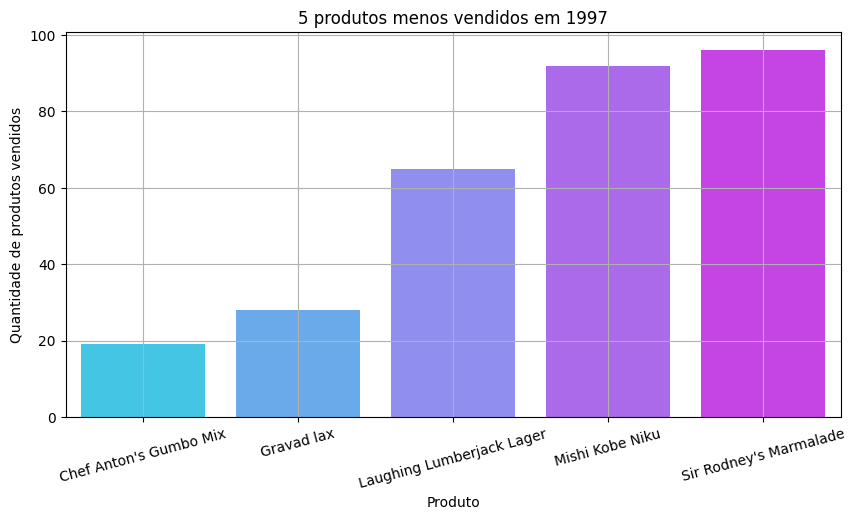

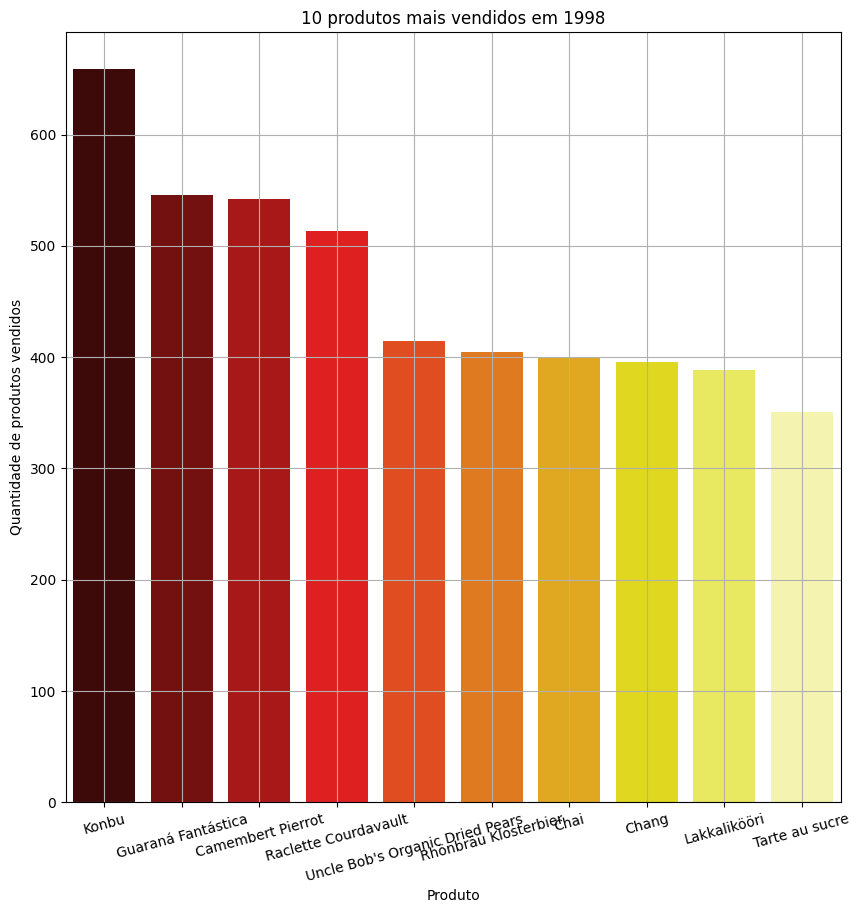

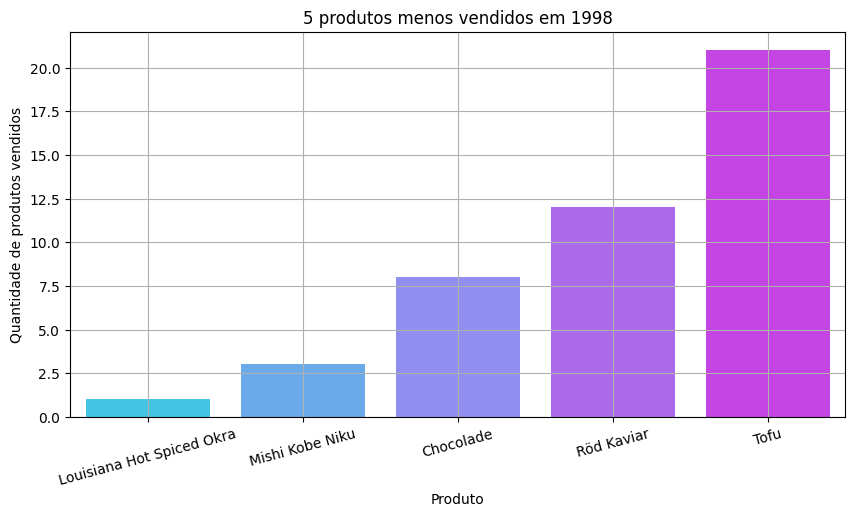

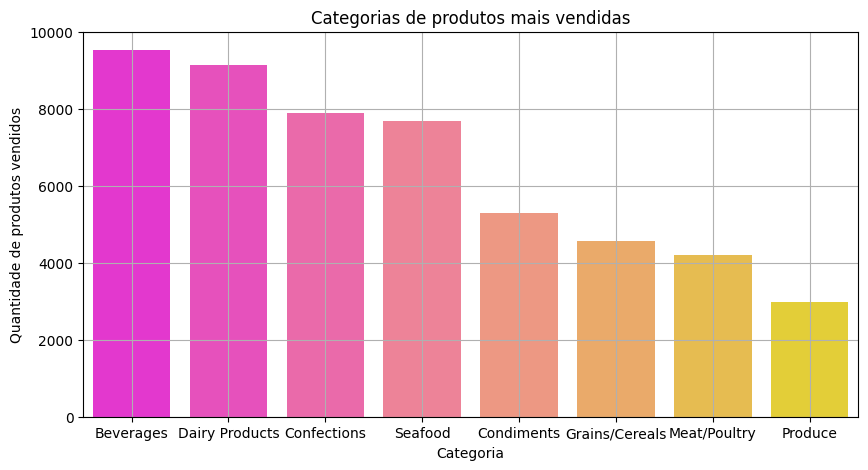

In [840]:
# 10 produtos mais vendidos em 1996, 1997 e 1998
for year in years:
    orders_year = orders[orders['year'] == year]
    merged_data = pd.merge(orders_year, order_details, on='order_id')
    merged_data = pd.merge(merged_data, products, on='product_id')
    value_counts = merged_data.groupby('product_name')['quantity'].sum()
    value_counts_2 = value_counts.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 10))
    sns.barplot(x=value_counts_2.index, y=value_counts_2.values, hue=value_counts_2.index, legend=False, palette='hot')
    plt.title(f'10 produtos mais vendidos em {year}')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade de produtos vendidos')
    plt.xticks(rotation=15)
    plt.grid()
    plt.show()

    value_counts = value_counts.sort_values(ascending=True).head(5)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False, palette='cool')
    plt.title(f'5 produtos menos vendidos em {year}')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade de produtos vendidos')
    plt.xticks(rotation=15)
    plt.grid()
    plt.show()



# As categorias de produtos mais vendidas da empresa
merged_data = pd.merge(order_details, products, on='product_id')
categories = dfs['categories']
merged_data = pd.merge(merged_data, categories, on="category_id")
value_counts = merged_data.groupby('category_name')['quantity'].sum()
value_counts = value_counts.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False, palette='spring')
plt.title('Categorias de produtos mais vendidas')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de produtos vendidos')
plt.grid()
plt.show()


Com essas informações, é aconselhável repensar a continuação de alguns produtos que possam não estar trazendo resultados desejáveis.
As bebidas trazem grande retorno a empresa, tendo presença assídua nos top 10 produtos mais vendidos do ano e sendo a categoria com maior quantidade de vendas.

## Presença da Northwind Traders pelo Mundo

Sendo uma empresa que trabalha com pedidos de todo o mundo, também é de suma importância saber onde estão suas **maiores demandas** para que elas possam ser tratadas com afinco. Melhorar o atendimento a certas regiões também pode ser um foco, algo que traria retorno para empresa pensando em médio/longo prazo.
Vamos observar um gráfico que mostra proporcionalmente os **países** que mais requisitaram pedidos na história da empresa. Alguns lugares com baixa quantidade de pedidos foram ignorados, afim de tornar melhor a visualização do panorama geral. Essa atitude pode trazer uma margem de erro de cerca de 0.2%, mas ainda sim o gráfico consegue dizer muita coisa.

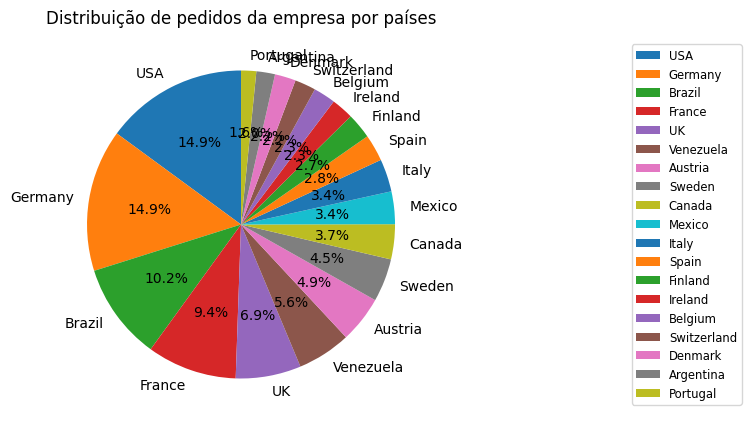

In [841]:
# Distribuição de pedidos da empresa por países
value_count = orders.groupby('ship_country')
value_count = value_count.size()
value_count = value_count.sort_values(ascending=False)
# Gráfico de pizza
plt.figure(figsize=(10, 5))
# Filtrando os países com quantidade de pedidos maior que 10
filtered_value_count = value_count[value_count > 10]
plt.pie(filtered_value_count.values, labels=filtered_value_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de pedidos da empresa por países')
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center left', fontsize='small')
plt.show()


O gráfico acima mostra quais países e regiões onde a demanda é maior pelos serviços da Northwind Traders e concluímos que *EUA*, *Alemanha* e *Brasil* são os **maiores consumidores**. Uma visão mais detadalhada de um dos maiores clientes da empresa pode agregar ainda mais.
A demanda ao longo de um país de grandes proporções como os EUA é variada e uma observação na distribuição das vendas pelo seu território pode vir a ser útil.
### Análise da distribuição pelos EUA

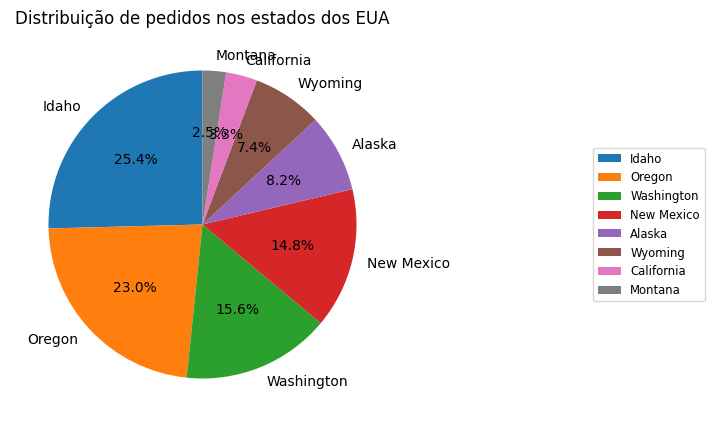

In [842]:

orders_USA = orders[orders['ship_country']=='USA']
us_states = dfs['us_states']
us_states = us_states.rename(columns={'state_abbr':'ship_region'})
orders_USA = pd.merge(orders_USA, us_states, on='ship_region')
value_count = orders_USA.groupby('state_name')
value_count = value_count.size()
value_count = value_count.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.pie(value_count.values, labels=value_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de pedidos nos estados dos EUA')
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center left', fontsize='small')
plt.show()



Os Estados Unidos têm cerca de 50 estados, é necessário pensar em talvez um investimento maior que cubra mais áreas do seu território. Um julgamento de como os territórios estão sendo cobertos pelos funcionários e pelo atendimento da empresa também pode trazer uma visão mais coerente da situação.

In [843]:
employees = dfs['employees']
employee_territories = dfs['employee_territories']
territories = dfs['territories']

merged_data = pd.merge(employees, employee_territories, on='employee_id')
merged_data = pd.merge(merged_data, territories, on='territory_id')
# Imprime apenas as colunas necessárias para a análise
merged_data = merged_data.loc[:, ["employee_id", "first_name", "last_name", "territory_description"]]
display(merged_data)

,employee_id,first_name,last_name,territory_description
0,1,Nancy,Davolio,Wilton
1,1,Nancy,Davolio,Neward
2,2,Andrew,Fuller,Westboro
3,2,Andrew,Fuller,Bedford
4,2,Andrew,Fuller,Georgetow
5,2,Andrew,Fuller,Boston
6,2,Andrew,Fuller,Cambridge
7,2,Andrew,Fuller,Braintree
8,2,Andrew,Fuller,Louisville
9,3,Janet,Leverling,Atlanta


Acima podemos ver como a empresa está distribuída pelo território dos Estados Unidos, observando em qual cidade se localizam cada um de seus nove funcionários.
É possível dizer que seria interessante para empresa, não só ter funcionários de maneira mais abrangente nos Estados Unidos, como também ter representantes acessíveis na Europa e na América do Sul, especificamente no Brasil. Uma maior proximidade da empresa com seus clientes fiéis poderia ajudar a manté-los por longo período de tempo.

## Desempenho dos Funcionários
Entender também como os funcionários da empresa estão desempenhando é essencial para manter o alto nível e o retorno financeiro.
No período de tempo correspondente ao banco de dados dos pedidos, os funcionários que mais estiveram envolvidos em vendas são:

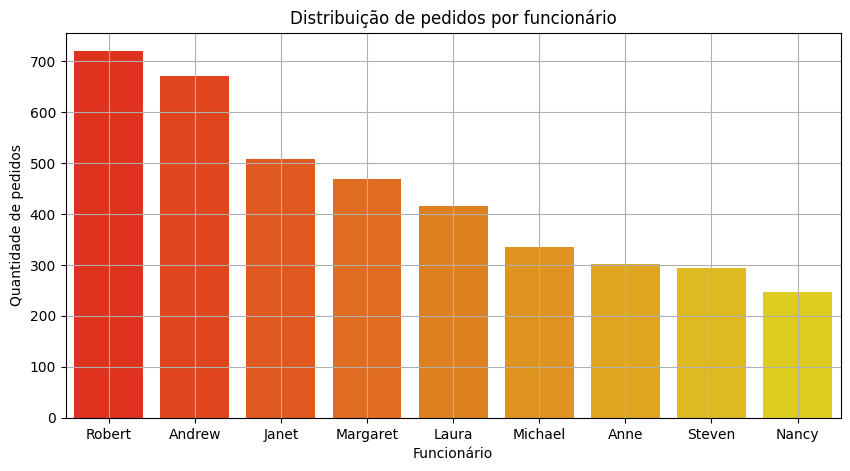

In [844]:
merged_data = pd.merge(merged_data, orders, on="employee_id")
# Considera o primeiro nome de cada um dos funcionários na contagem de aparição deles nos pedidos
value_count = merged_data.groupby('first_name')
value_count = value_count.size()
value_count = value_count.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=value_count.index, y=value_count.values, hue=value_count.index, legend=False, palette='autumn')
plt.title('Distribuição de pedidos por funcionário')
plt.xlabel('Funcionário')
plt.ylabel('Quantidade de pedidos')
plt.grid()
plt.show()


## Variação do Preço dos Produtos
Os produtos mudam de preço ao longo do tempo, com isso, é interessante também acompanhar como essa alteração pode influenciar nas vendas.
Abaixo, geramos um produto aleatório e o gráfico mostra como seu preço mudou.

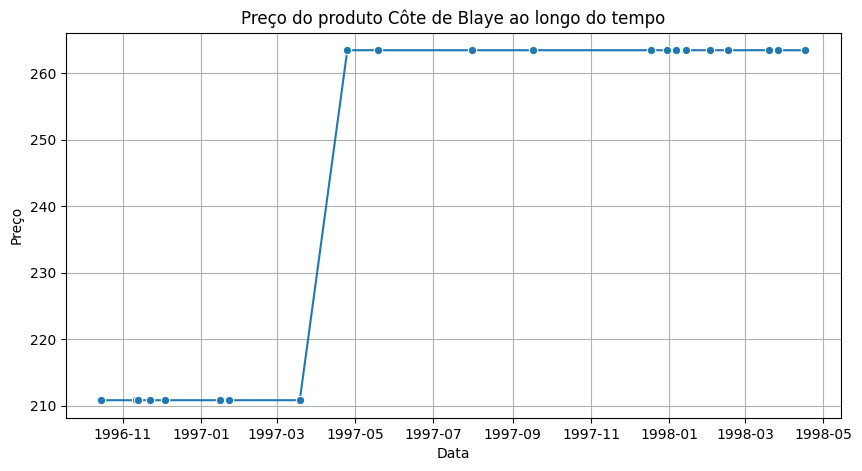

In [845]:
valid_products = products[products['discontinued'] == 0]
merged_data = pd.merge(order_details, orders, on="order_id")
merged_data = pd.merge(merged_data, valid_products, on='product_id')
# Seleciona um produto aleatorio
product = merged_data.sample()
product_name = product['product_name'].values[0]
# Avalia o preço desse produto ao longo do tempo
product = merged_data[merged_data['product_name'] == product_name]
value_counts_2 = product.groupby('order_date')['unit_price_x'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=value_counts_2.index, y=value_counts_2.values, marker='o')
plt.title(f'Preço do produto {product_name} ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid()
plt.show()



O gráfico ajuda a ver a mudança de preço do produto e o quanto isso pode ter impactado nas vendas do mesmo (sua ocorrência representadas pelos pontinhos).

## Conclusão

Através do estudo dos dados e a criação de gráficos que ajudam a interpretá-los melhor foi possível fazer uma analíse do desempenho da empresa Northwind Traders. As ambições de aumentar o ticket médio e reduzir a perda de clientes a médio prazo podem ser alcançadas através de decisões tomadas cautelosamente de acordo com as informações adquiridas através desse levantamento geral.
Nesse relatório de indicadores de desempenho, o método escolhido foi a linguagem de programação Python, através de sua biblioteca Pandas, eficaz para manipulação de dados, e também as bibliotecas Matplot e Seaborn, utilizadas para plotagem de gráficos.
Finalmente, é importante ressaltar que a análise de dados é um processo contínuo e deve ser feito constamente por uma empresa que busca crescer e se manter competitiva no mercado.